In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

# Problem 1

### Problem 1.1

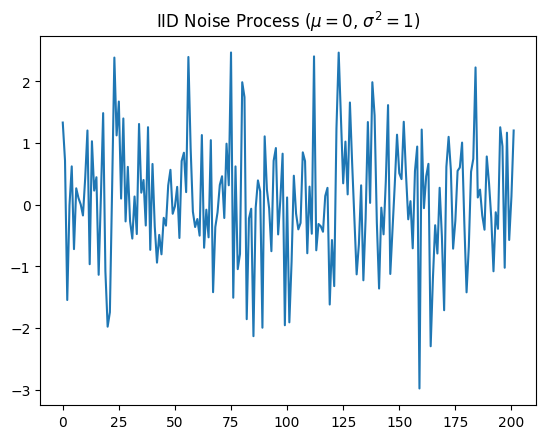

In [2]:
rs = np.random.RandomState(seed=10)
mean = 0
std = 1

noise = []

t = range(202)

for i in t:
    noise.append(sp.norm.rvs(loc=mean,scale=std,random_state=rs))

plt.plot(t,noise)
plt.title('IID Noise Process ($\mu=0$, $\sigma^2=1$)')
plt.show()

## Problem 1.2

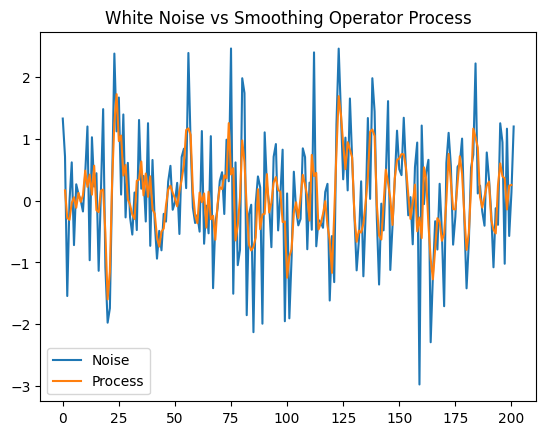

In [3]:
X_t = []
for i in range(1,201):
    X_t.append(1/3*(noise[i-1] + noise[i] + noise[i+1]))

plt.plot(t,noise,label='Noise')
plt.plot(t[1:-1],X_t,label='Process')
plt.title('White Noise vs Smoothing Operator Process')
plt.legend()
plt.show()

The process seems to have slightly less volatility.

## Problem 1.3

See PDF

## Problem 1.4

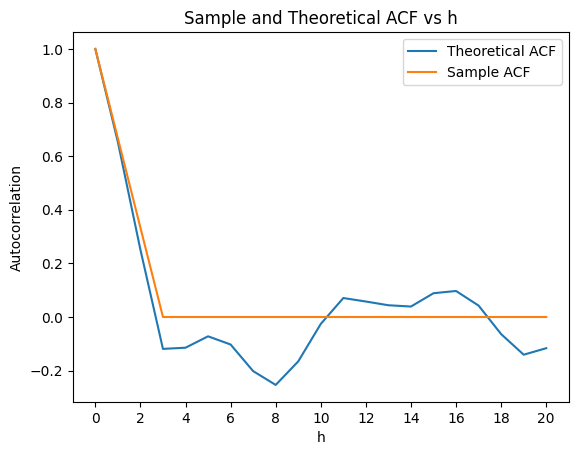

In [4]:
n = len(X_t)

def sample_acvf_fxn(h,X_t):
    sample_mean = np.mean(X_t)
    n = len(X_t)
    acvf = 0
    for t in range(n-abs(h)):
        acvf += (X_t[t+abs(h)]-sample_mean) * (X_t[t]-sample_mean)
    acvf = acvf/n
    return acvf

sample_acf = []
for h in range(21):
    sample_acf.append(sample_acvf_fxn(h,X_t) / sample_acvf_fxn(0,X_t))

theoretical_acf = [1,2/3,1/3] + [0] * (21-3)

plt.plot(range(21),sample_acf,label='Theoretical ACF')
plt.plot(range(21),theoretical_acf, label='Sample ACF')
plt.title('Sample and Theoretical ACF vs h')
plt.xlabel('h')
plt.xticks(np.arange(0,21,2))
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

The relationship is complicated but they imply a similar result: a larger h is shown/thought to have a lower ACF, close to zero. Also, we can see that for h = 0,1,2, the values match almost identically. However, when the theoretical ACF is zero (h>2), the sample ACF fluctuates moderately around 0.

# Problem 2

## Problem 2.1

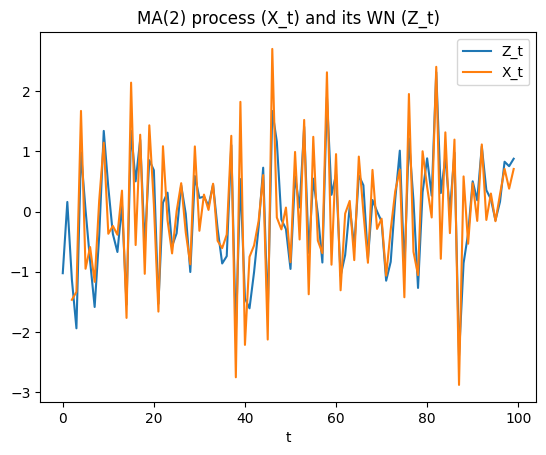

In [5]:
Z_t, X_t = ([],[])

for t in range(100):
    Z_t.append(sp.norm.rvs(loc=0,scale=1, random_state = rs))

    if (t > 1):
        X_t.append(Z_t[t] - .5*Z_t[t-1] + .25*Z_t[t-2])

plt.plot(range(100), Z_t, label='Z_t')
plt.plot(range(2,100), X_t, label='X_t')
plt.legend()
plt.xlabel('t')
plt.title('MA(2) process (X_t) and its WN (Z_t)')
plt.show()

## Problem 2.2

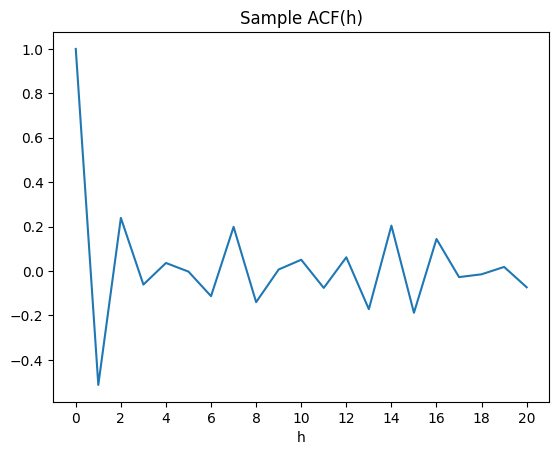

In [6]:
sample_mean = np.mean(X_t)
sample_ACVF = []

n = len(X_t)

for h in range(21):
    sample_ACVF.append(
        sample_acvf_fxn(h,X_t) / sample_acvf_fxn(0,X_t)
        )
    
plt.plot(range(21), sample_ACVF)
plt.title('Sample ACF(h)')
plt.xlabel('h')
plt.xticks(np.arange(0,21,2))
plt.show()

## Problem 2.3

It seems that for $h>2$ the sample ACF becomes close to zero. Thus, I would assume that the order is 2nd order, however, that is not extremely certain since fluctuations to the same value as h=2 occur later in the series.

# Problem 3

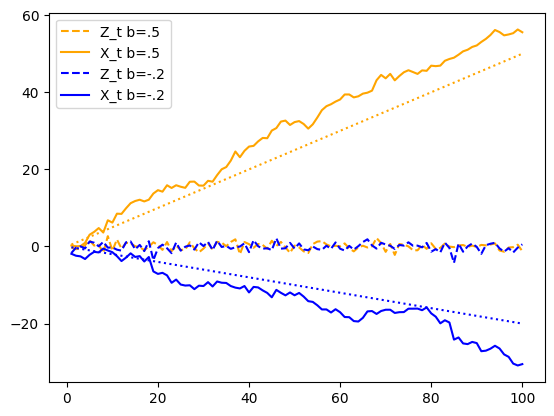

In [7]:
Z_t, X_t = ([],[])

b = .5

for i in range(1,101):
    Z_t.append(
        sp.norm.rvs(loc=0, scale=1, random_state = rs)
    )

    X_t.append(
        b*i + np.sum(Z_t)
    )


plt.plot(range(1,101), Z_t, label='Z_t b=.5', color='orange',ls='--')
plt.plot(range(1,101), X_t, label='X_t b=.5', color='orange')

Z_t, X_t = ([],[])

b = -.2

for i in range(1,101):
    Z_t.append(
        sp.norm.rvs(loc=0, scale=1)
    )

    X_t.append(
        b*i + np.sum(Z_t)
    )

plt.plot(range(1,101), Z_t, label='Z_t b=-.2', color='blue', ls='--')
plt.plot(range(1,101), X_t, label='X_t b=-.2', color='blue')

plt.plot(range(1,101), [.5*r for r in range(1,101)],ls='dotted', color='orange')
plt.plot(range(1,101), [-.2*r for r in range(1,101)],ls='dotted', color='blue')
plt.legend()
plt.legend()
plt.show()

I can see that the random walk process follows the function of its drift process (dotted), which makes sense since $Z_t$ has mean 0, but not perfectly, which reflects the variance of $Z_t$.